# How to use Spectrum objects

SpecpolFlow provides a python class that holds a <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object.  These objects contain the basic data for a spectroscopic or spectropolarimetric observation.

A <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object contains the following data arrays:

* wl - wavelengths
* specI - Stokes I spectrum
* specV - polarized spectrum, usually Stokes V
* specN1 - the first polarimetric null spectrum
* specN2 - the second polarimetric null spectrum
* specSig - the formal uncertainties, which apply to the all spectra.
* header - the text in the header of a .s file

For an observation with just an intensity spectrum (no polarization), the specV, specN1, and specN2 arrays will all be zeros.

First import specpolFlow and any other packages

In [356]:
import specpolFlow as pol
import matplotlib.pyplot as plt
import numpy as np

In this tutorial, we use the UPENA normalized spectrum ([IndividualLine_tutorialfiles/1423137pn.s](https://github.com/folsomcp/specpolFlow/blob/main/docs-jb/Tutorials/IndividualLine_tutorialfiles/1423137pn.s)) of the active cool star BP Tau.

## How to load and save a Spectrum from a '.s' file

::::{margin}
:::{note}
The <a href='../API/Spectrum_API.html#specpolFlow.read_spectrum'>`read_spectrum`</a> has a few optional advanced keywords that can be used to automatically reject some types of bad data (e.g. negative flux values), and to order the datapoints in order of wavelengths -- see the API for details. 
:::
::::
To load in a spectrum in .s format, we can use the <a href='../API/Spectrum_API.html#specpolFlow.read_spectrum'>`read_spectrum`</a> function. 

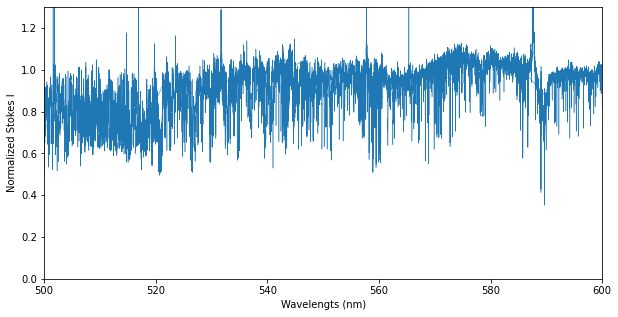

In [357]:
spec = pol.read_spectrum('IndividualLine_tutorialfiles/1423137pn.s')

# Make a figure of Stokes I
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(spec.wl, spec.specI, lw=0.5)
ax.set_ylim(0.0, 1.3)
ax.set_xlim(500.0, 600.0)
ax.set_xlabel('Wavelengts (nm)')
ax.set_ylabel('Normalized Stokes I')
plt.show()

If the '.s' file had a text header, it will be available from the `header` property of the <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object:

In [358]:
print(spec.header)

None


As you can see here, since the file did not have a header, the `spec.header` is set to `None`.  (Note, this uses the special Python value `None`, not the text "None").

A <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object can be saved in a text '.s' format with the <a href='../API/Spectrum_API.html#specpolFlow.Spectrum.save'>`spectrum.save`</a> class function.

In the example below, we will add a header to the <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object, and save. 

In [359]:
spec.header = 'Spectrum for star BP Tau'

spec.save('Output/Spectrum.s', saveHeader = True)
# saveHeader = True is the default
# saveHeader = False will skip the '.s' 2-line header when writing the file

:::{note}
The <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> class supports 3 types of '.s' file format
* Polarimetric spectrum with 6 columns
* Spectroscopic spectrum with 3 columns (Wavelength, Flux, uncertainty): in this case the spectrum.specV, spectrum.N1, spectrum.N2 will be set to zero
* Spectroscopic spectrum with 2 columns (Wavelength, Flux): in this case spectrum.specSig, spectrum.specV, spectrum.N1, spectrum.N2 will be set to zero

The <a href='../API/Spectrum_API.html#specpolFlow.Spectrum.save'>`Spectrum.save`</a> function will save the spectrum in a 2, 3, or 6 columns format, if it detects columns that are strictly filled with zeros. 
:::

## How to use indexing and concatenation

A <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object can be sliced and indexed using normal Python list indexing, and Numpy advanced indexing.

In [360]:
spec = pol.read_spectrum("IndividualLine_tutorialfiles/1423137pn.s")

print('The spectrum has {} datapoints'.format(len(spec)))

print('The maximum wavelength is {} nm'.format(spec.wl[-1]))

cut_spectrum = spec[spec.wl > 600.0]
print(cut_spectrum[0].wl)

slice_650_663 = spec[(spec.wl > 650.0) & (spec.wl < 663.0)]
print(slice_650_663[0].wl, slice_650_663[-1].wl)

The spectrum has 213542 datapoints
The maximum wavelength is 1048.0382 nm
600.0012
650.0032 662.9992


Here's a slightly more advanced example that illustrates how one can assign a <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object to a slice of another <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object. Here, we replace a section of the spectrum with ones for the intensity and zeros for the polarization. Of course, it is also possible to assigned arrays of zeros and ones to each individual arrays of `spec`. 
````
spec.specI[0:7000] = 1.0
spec.specV[0:7000] = 0.0
...
````

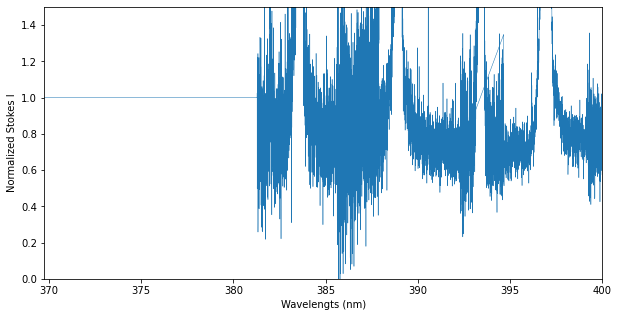

In [361]:
# Create a new Spectrum object with 7000 datapoints
n = 7000
replace = pol.Spectrum(spec.wl[0:n], np.ones(n), # wl and specI
                       np.zeros(n), np.zeros(n), np.zeros(n), # specV, specN1, and specN2
                       np.ones(n)) # specSig

#Overwrite a portion of an existing Spectrum object
spec[0:n] = replace

# Make a figure of Stokes I
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(spec.wl, spec.specI, lw=0.5)
ax.set_ylim(0.0, 1.5)
ax.set_xlim(min(spec.wl), 400.0)
ax.set_xlabel('Wavelengts (nm)')
ax.set_ylabel('Normalized Stokes I')
plt.show()

We can also concatenate mutiple <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> object using the <a href='../API/Spectrum_API.html#specpolFlow.Spectrum.contatenate'>`Spectrum.concatenate`</a> class function. 

In the example below, we create three new <a href='../API/Spectrum_API.html#specpolFlow.Spectrum'>`Spectrum`</a> objects by slicing `spec`, and we then concatenate them together

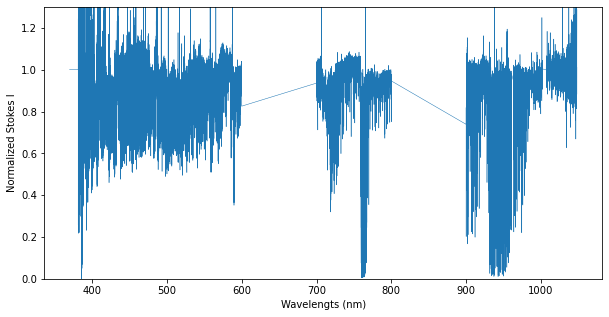

In [362]:
spec1 = spec[spec.wl < 600.0]
# You can combined criteria using & and brackets:
spec2 = spec[(spec.wl > 700.0) & (spec.wl < 800.0)]
# Or you can use numpy's logic functions:
spec2 = spec[np.logical_and(spec.wl > 700.0, spec.wl < 800.0)]
spec3 = spec[spec.wl > 900.0]

spec_cat = spec1.concatenate([spec2, spec3])

# Make a figure of Stokes I
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(spec_cat.wl, spec_cat.specI, lw=0.5)
ax.set_ylim(0.0, 1.3)
ax.set_xlabel('Wavelengts (nm)')
ax.set_ylabel('Normalized Stokes I')
plt.show()

## How to extract and merge spectral orders for echelle spectra

Some spectra will contain order-overlaps (wavelength regions that were recorded twice by an echelle spectrograph, in two different echelle orders).  In the .s format, the wavelength column goes backward at the edges of the overlaps. 

In the figure below, we illustrate these overlap regions by color-coding the different spectral orders.  This example uses the <a href='../API/Spectrum_API.html#specpolFlow.Spectrum.get_orders'>`Spectrum.get_orders`</a> class function to make individual Spectrum objects for each echelle order.

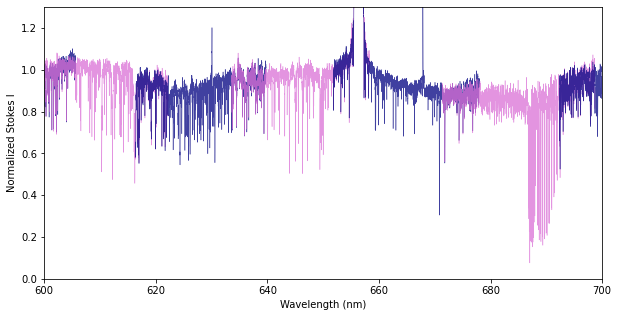

In [363]:
spec = pol.read_spectrum("IndividualLine_tutorialfiles/1423137pn.s")

#Get the individual spectral orders
orders = spec.get_orders()
order_color=['orchid', 'navy']

# Make a figure of Stokes I
fig, ax = plt.subplots(1, 1, figsize=(10,5))
for i, order in enumerate(orders):
    ax.plot(order.wl, order.specI, lw=0.5, c=order_color[i % 2], alpha=0.75)
ax.set_ylim(0.0, 1.3)
ax.set_xlim(600.0, 700.0)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Normalized Stokes I')
plt.show()

If you are only interested in spectral orders around a specific wavelength or range, you can use the <a href='../API/Spectrum_API.html#specpolFlow.Spectrum.get_orders_in_range'>`Spectrum.get_orders_in_range`</a> class function.  This will get only special orders that include the wavelength range requested, and return them as a list of Spectrum objects.

For some kinds of analysis it is important to remove the order overlap regions, so that the wavelength increases continuously and there are no near-duplicate pixels.  SpecpolFlow provides two methods to deal with all of the order overlaps all at once. 

:::{tip}
If you are interested in a specific spectral line and need to consider the order merging process more carefully, have a look at the [](7-IndividualLine_Tutorial.ipynb) tutorial. 
:::

We here use the 'trim' method of the <a href='../API/Spectrum_API.html#specpolFlow.Spectrum.merge_orders'>`Spectrum.merge_orders`</a> function, which keeps a fraction of the overlap in each adjacent order, with the proportion set according to the 'midpoint' keyword. This is the simplest method and can be helpful if the continuum normalization is poor near order edges.

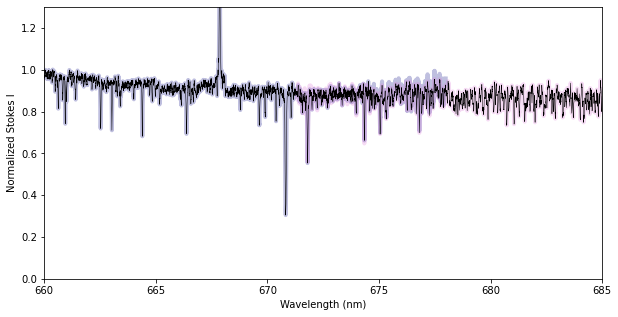

In [364]:
# Using the Spectrum class function to create a Spectrum object 
# with the overlap merged trimmed in the middle of the overlap
spec_merged = spec.merge_orders(mode='trim', midpoint=0.5)

#If you'd like to save the result to a file, you can use the save class-function
# spec_merged.save('spectrum_merged.s')

# Make a figure of Stokes I
fig, ax = plt.subplots(1, 1, figsize=(10,5))
for i, order in enumerate(orders):
    ax.plot(order.wl, order.specI, lw=4, c=order_color[i % 2], alpha=0.25)
ax.plot(spec_merged.wl, spec_merged.specI, lw=0.5, c='k')
ax.set_ylim(0.0, 1.3)
ax.set_xlim(660.0, 685.0)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Normalized Stokes I')
plt.show()

Alternatively, you can use the 'coadd' method, which tries to coadd pixels from the two orders in the overlap region.  This essentially interpolates pixels from the second order onto the wavelengths of the first order, before combining them.  This optimizes the total S/N in the overlap region, but is vulnerable to systematic errors (e.g. poor normalization) in either spectral order.  

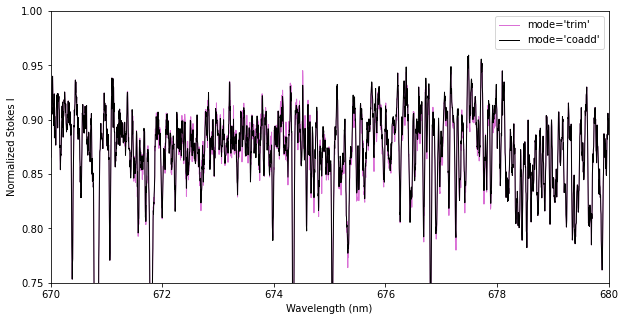

In [365]:
# Merge spectral orders by coadding pixels
spec_merged2 = spec.merge_orders(mode='coadd')

# Compare the results from the two approaches to merging orders
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(spec_merged.wl, spec_merged.specI, lw=1.0, c='orchid', label="mode='trim'")
ax.plot(spec_merged2.wl, spec_merged2.specI, lw=1.0, c='k', label="mode='coadd'")
ax.set_ylim(0.75, 1.0)
ax.set_xlim(670.0, 680.0)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Normalized Stokes I')
ax.legend()
plt.show()

## How to coadd multiple spectra

Sometimes you may have multiple spectra that you would like to average together.  For example, a long ESPaDOnS observation that was split into multiple sequences to respect the integration time limit.  You can use the <a href='../API/Spectrum_API.html#specpolFlow.Spectrum.coadd'>`Spectrum.coadd`</a> class function for this.  This essentially averages spectra weighted by the error bars (really weighted by 1/sigma**2).  Thus this needs valid error bars to work.  The function interpolates the wavelengths of the observations onto the wavelength grid of the first spectrum (i.e. onto the wavelength grid of the Spectrum object calling the coadd function).

:::{warning}
Using this function with spectra that contains order overlaps will not result in correct results. Make sure that you have cut or merged the order overlaps first (see previous section). 
:::

For this example, we will use 3 observations of the B-type star HD 46328
* [hd46328_test_1.s](https://raw.githubusercontent.com/folsomcp/specpolFlow/main/docs-jb/GetStarted/OneObservationFlow_tutorialfiles/hd46328_test_1.s)
* [hd46328_test_2.s](https://raw.githubusercontent.com/folsomcp/specpolFlow/main/docs-jb/GetStarted/OneObservationFlow_tutorialfiles/hd46328_test_2.s)
* [hd46328_test_3.s](https://raw.githubusercontent.com/folsomcp/specpolFlow/main/docs-jb/GetStarted/OneObservationFlow_tutorialfiles/hd46328_test_3.s)

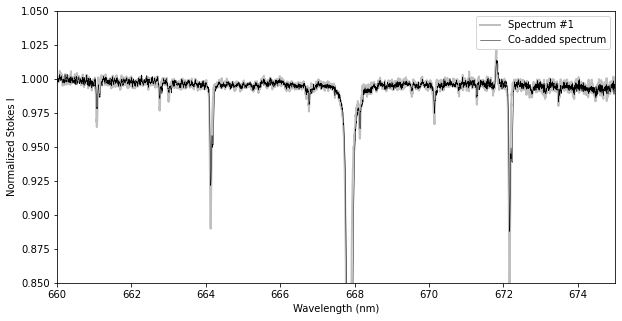

In [366]:
# Reading the spectra and merging the order overlaps with default settings
spec1 = pol.read_spectrum('../GetStarted/OneObservationFlow_tutorialfiles/hd46328_test_1.s').merge_orders()
spec2 = pol.read_spectrum('../GetStarted/OneObservationFlow_tutorialfiles/hd46328_test_2.s').merge_orders()
spec3 = pol.read_spectrum('../GetStarted/OneObservationFlow_tutorialfiles/hd46328_test_3.s').merge_orders()

# The coadd class-function might return an error if the uncertainty in the
# spectra are zero or negative (because of the weighting)
# Here, remove these 'bad pixels' by setting the uncertainty to infinity
# (so they will not contribute to the weighted average)
spec1.specSig[spec1.specSig <= 0.0] = np.inf
spec2.specSig[spec2.specSig <= 0.0] = np.inf
spec3.specSig[spec3.specSig <= 0.0] = np.inf

# co-adding the 3 spectra together 
# (interpolating on the wavelength grid of the first spectrum)
spec_coadd = spec1.coadd([spec2, spec3])


# Make a figure of Stokes I
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(spec1.wl, spec1.specI, lw=2, c='0.75', label='Spectrum #1')
ax.plot(spec_coadd.wl, spec_coadd.specI, lw = 0.5, c='k', label='Co-added spectrum')
ax.set_ylim(0.85, 1.05)
ax.set_xlim(660.0, 675.0)
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Normalized Stokes I')
ax.legend()
plt.show()